# LogisticRegression

In [14]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
plt.rcParams['figure.figsize'] = (10,10)

# Load dataset

This program builds a classifier for Pima Indians Diabetes dataset - https://www.kaggle.com/uciml/pima-indians-diabetes-database. It is a binary (2-class) classification problem. There are 768 observations with 8 input variables and 1 output/target variable. The variable names are as follows:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [15]:
diabetes = pd.read_csv('data/diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [16]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Explore dataset (dimension, categories, groups, etc)

In [17]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

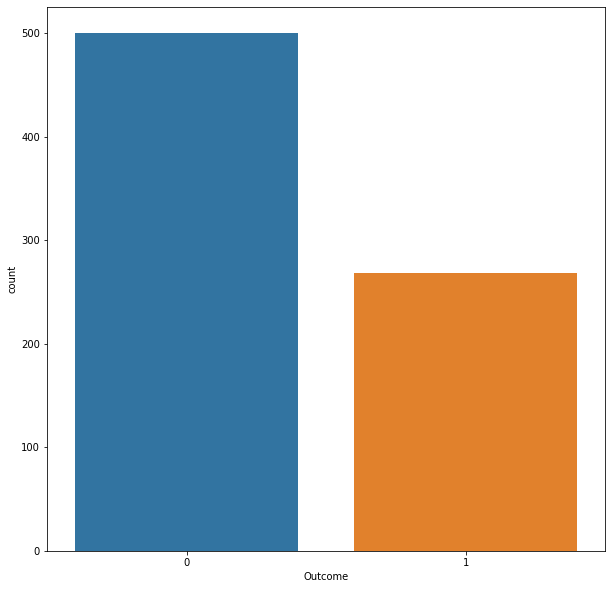

In [23]:
sns.countplot(diabetes.Outcome)

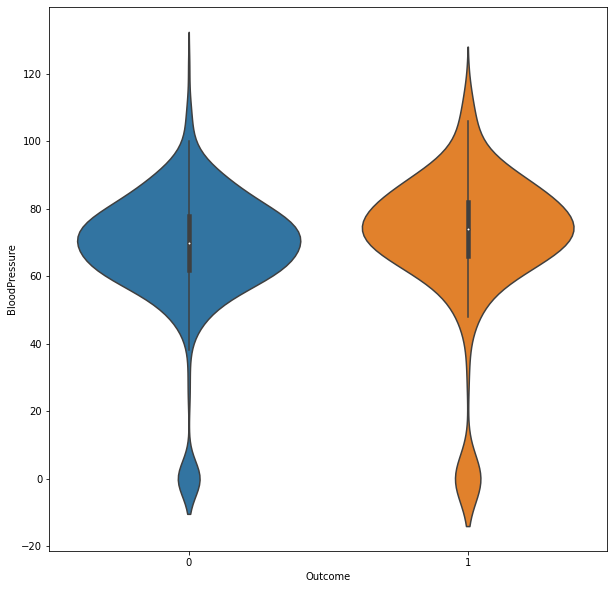

In [25]:
sns.violinplot(x='Outcome', y='BloodPressure', data=diabetes)

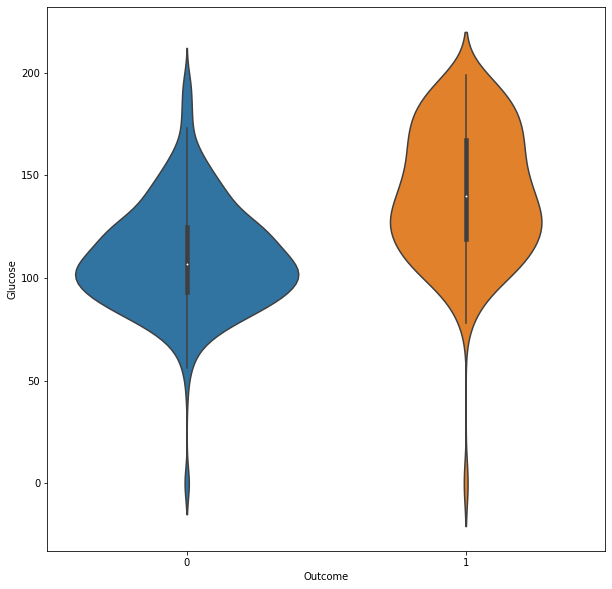

In [26]:
sns.violinplot(x='Outcome', y='Glucose', data=diabetes)

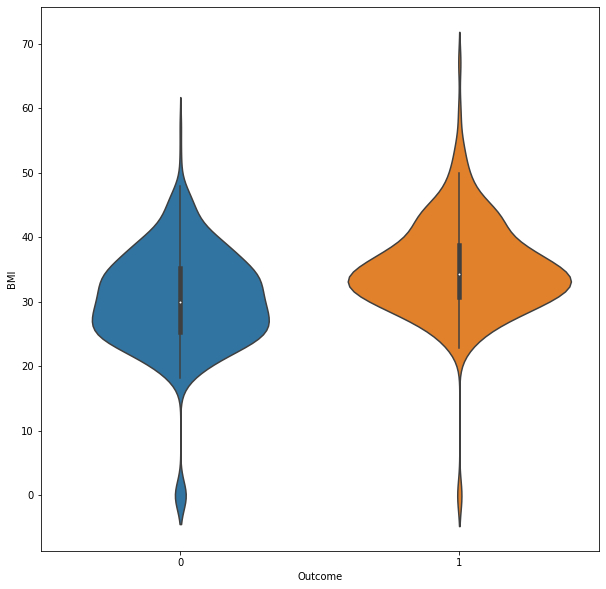

In [27]:
sns.violinplot(x='Outcome', y='BMI', data=diabetes)

## Model

Get X,y

In [28]:
X = diabetes.drop('Outcome', axis=1).values

In [29]:
y = diabetes.Outcome

In [30]:
X.shape

(768, 8)

In [31]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 45)

# Logistic Regression
Logistic regression is one of the most common classification algorithms.

In [32]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(max_iter=1000)

In [37]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
model.score(X_train, y_train)

0.7914110429447853

In [39]:
model.score(X_test, y_test)

0.7155172413793104

In [42]:
y_pred = model.predict(X_test)

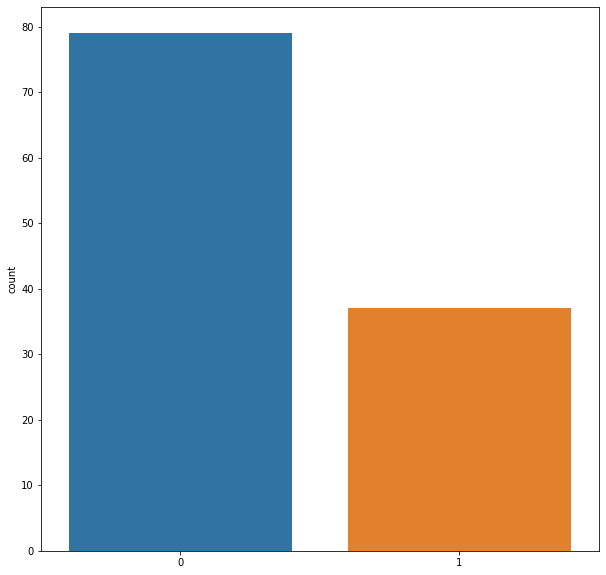

In [45]:
sns.countplot(y_pred)

In [48]:
sum(y_test == 0) / len(y_test)

0.6379310344827587

In [50]:
?confusion_matrix

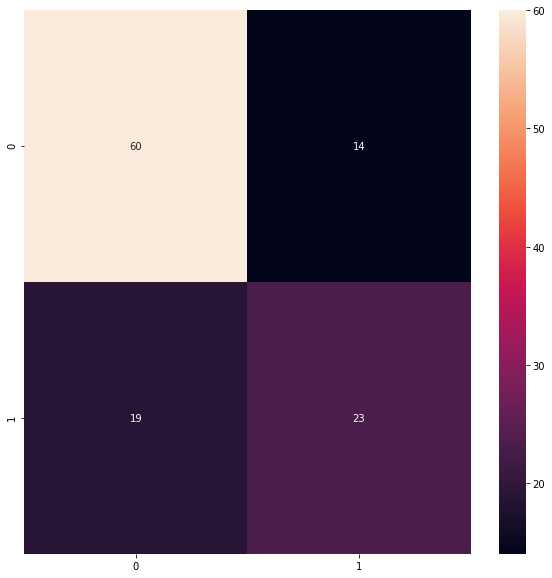

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        74
           1       0.62      0.55      0.58        42

    accuracy                           0.72       116
   macro avg       0.69      0.68      0.68       116
weighted avg       0.71      0.72      0.71       116



# Evaluate model

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [55]:
accuracy_score(y_test, y_pred)

0.7155172413793104

In [56]:
precision_score(y_test, y_pred)

0.6216216216216216

In [57]:
recall_score(y_test, y_pred)

0.5476190476190477

In [58]:
f1_score(y_test, y_pred)

0.5822784810126581

## ROC/AUC

In [93]:
y_pred_probs = model.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]

In [86]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_probs)

In [87]:
auc(fpr, tpr)

0.7937580437580437

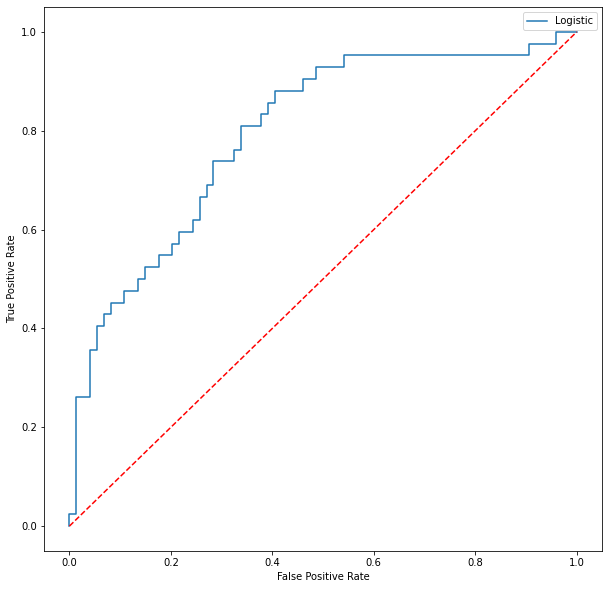

In [89]:
plt.plot(fpr, tpr, label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

plt.plot([0,1], [0,1], c='red', linestyle='--')